# 关于loss和delta_predict的sum的解析

- 假设，我们有两个样本，每个样本具有两个特征，在逻辑回归中，以下式子成立：<br><br>
$$ X @ W = P  \qquad\qquad【1】$$
其中,考虑上偏置，有 X (2,3)   W(3x1)     P(2,1)

求loss对predict的导数（以下我们简写predict 为P)，有：<br><br>
$$ \frac{\partial L}{\partial P} = [\frac{\partial L}{\partial p_1} \quad \frac{\partial L}{\partial p_2}]\qquad\qquad 【2】$$ 注意这里的[         ]中括号并不是矩阵，仅仅是表示求导数是求分别对p1和p2的求导。
<br>因为 

$$ L = \frac{1}{batchsize}* \sum_{i=1}^2 y_i*log(q_i) + (1-y_i) * log(1-q_i) \qquad\qquad【3】
$$
     
        

$$\qquad \qquad\qquad\qquad\qquad\;\;\;\; = \frac{[ y_1*log(q_1) + (1-y_1) * log(1-q_1)] + [y_2*log(q_2) + (1-y_2) * log(1-q_2))]}{batchsize} \qquad\qquad【4】$$ 

在上式中， $q = sigmoid\;(p)$，我们还约定，y是label，p是predict, q为probability（范围为0~1）<br>
如果我们仔细观察式子【4】，我们会发现当Loss对p1求导时，【4】中只有第一个中括号含有p1(注意 q1=sigmoid(p1)，这时候第二个中括号当作常数。<br>
同样的，当我们Loss对p2求导时，【4】中只有第二个中括号有p2(注意 q2=sigmoid(p2))，这时候第一个中括号当作常数。并且，我们对常数求导为0。所以我们得到下面的式子：

$$ \frac{\partial L}{\partial p_1} = \frac{1}{batchsize}[ sigmoid(p_1)-y_1] \qquad\qquad【5】$$
<br>
$$ \frac{\partial L}{\partial p_2} = \frac{1}{batchsize}[ sigmoid(p_2)-y_2] \qquad\qquad【6】$$


回顾一下线性回归：
$$ J = \frac{1}{2} \sum_{i=1}^n(h_\theta(x^{(i)}-y^{(i)})^2$$

再来看一下

**综上所述**：【3】中的求和符号对应代码的loss = -np.sum... <br>
             【5】【6】中没有求和符号。由于我们做批量计算我们就把两个样本用矩阵的形式写在了一起（即 $Q-Y 或者 Sigmoid(P)-Y$），系数1/batchsize来自于[4]的求导。

**Reference:** 公式参考 图1  【2】黄致远  图2  【5】李云飞
<br><br>
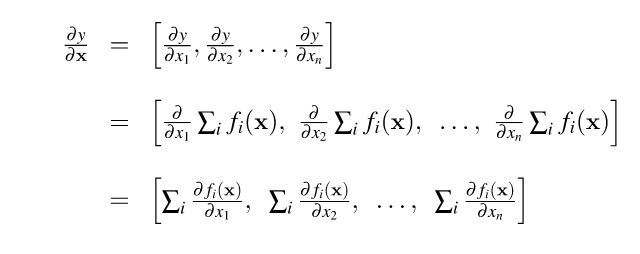
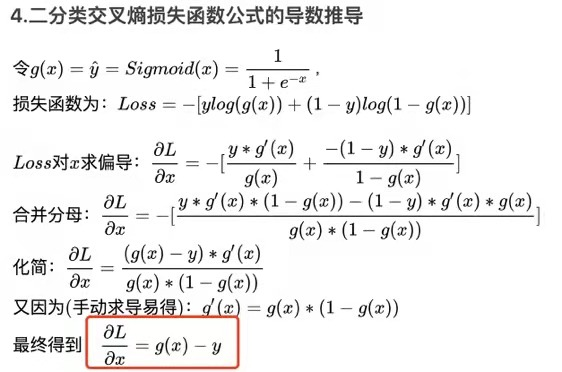